In [1]:
## Load utilities
# Numpy: for scientific computing and arrays
import numpy as np
# Matplotlib: for plotting
import matplotlib.pyplot as plt
# Seaborn: high level plots
import seaborn as sns
# Pandas: data analysis package
import pandas as pd

In [2]:
from sklearn.linear_model import SGDRegressor

In [3]:
# Load data
filename = "ANN_7ksliced.pk"
data = np.load(filename)

In [4]:
dname  = np.array(data[0]['dvarNames']) 
oname  = np.array(data[0]['objNames'])
names  = data[0]['dvarNames'] + data[0]['objNames'] # all names
dval   = np.asarray(data[1]['dvarValues'],dtype=np.float64) # convert string to float
oval   = np.asarray(data[1]['objValues'],dtype=np.float64)  
values = np.concatenate((dval,oval),axis=1) # concatenate

In [5]:
emittX = oval[:,3]

In [6]:
# Normalisation array: data between [0,1]
def norm(x):
    return (x-min(x))/(max(x)-min(x))
# Unnormalise
def unnorm(x, minx, maxx):
    return (x*(maxx-minx) + minx)

In [7]:
exN = norm(emittX)

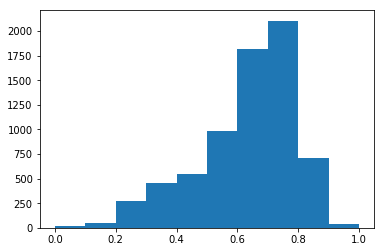

In [8]:
plt.hist(exN);

In [9]:
dvalN = np.empty(np.shape(dval))

In [10]:
# Normalise each variable individually!
for i in range(len(dname)):
    dvalN[:,i] = norm(dval[:,i]) 

In [11]:
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1, tol=1e-3)
# default learning schedule
# no regularization --> penalty=None
# tol: tolerance of final solution
sgd_reg.fit(dvalN,exN); # reshape into 2-d array,

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.80198508]),
 array([ 0.06695585,  0.0035352 ,  0.20780129, -0.03895955, -0.14360616,
        -0.42906406]))

In [13]:
predictionsN = sgd_reg.predict(dvalN)

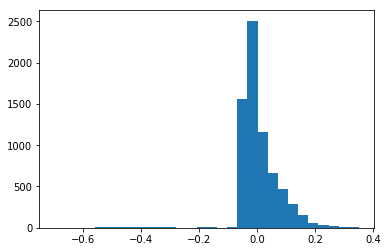

In [15]:
plt.hist(predictionsN - exN, bins=30);

In [16]:
predictions = unnorm(predictionsN, min(emittX), max(emittX))

In [17]:
predictions

array([4.41443165e-06, 4.06303353e-06, 3.87259358e-06, ...,
       5.10469418e-06, 5.23893187e-06, 4.62322276e-06])

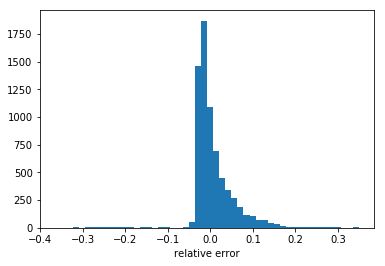

In [18]:
rel_error = (predictions - emittX) / emittX
plt.hist(rel_error, bins=50)
plt.xlabel("relative error");